<a href="https://colab.research.google.com/github/austinbennysmith/OSOM-ERDDAP/blob/master/MODIS_%26_VIIRS_Climatologies_Slow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code **graphs the monthly climatologies** of chlorophyll a, k490, or PAR from MODIS & VIIRS vs time. This is very slow, and the "MODIS & VIIRS Faster Comparisons" notebook will generally work better, but that one does not graph PAR.

In [2]:
#First, some installations and imports:
!pip install netCDF4
import requests
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import calendar
import datetime

The following code cell defines a function that makes a list of dates and uses conditionals to define some variables that will be used in making the url and labeling the plots. This is the cell where you can change the dates you want to graph.

In [3]:
#For a more thoroughly commented version of this cell, see the "Spatial Averages Slow" notebook
#the code dealing with datetime here is based on code at this link: https://stackoverflow.com/questions/1060279/iterating-through-a-range-of-dates-in-python
#This link also helped with datetime stuff: https://stackoverflow.com/questions/5734438/how-to-create-a-month-iteratorimport datetime
from datetime import date, timedelta
from datetime import datetime as dt
def conditionals():
  #since this is a function, and I want a bunch of the variables to be referenced outside of the function, I use global below for a bunch of the variables. Otherwise if I try to reference those variables outside of this function, it won't work.
  global dates2
  global myvar
  global title
  global dataset_id
  global tt
  global tres
  global unit
  global means
  global timearray
  global satellite
  global thecolor
  global shortsat
  dates2 = []
  #Modis dataset IDs: 'erdMH1chla1day', 'erdMH1chla8day', 'erdMH1chlamday', 'erdMH1kd4901day', 'erdMH1kd4908day', 'erdMH1kd490mday', 'erdMH1par01day', 'erdMH1par08day', 'erdMH1par0mday'
  #VIIRS dataset IDs: 'erdVH2018chla8day', 'erdVH2018chla1day', 'erdVH2018chlamday', 'erdVH2018k4908day', 'erdVH2018k4901day', 'erdVH2018k490mday', 'erdVH2018par8day', 'erdVH2018par1day', 'erdVH2018parmday'
  dataset_id = input("What's the dataset ID?")
  if 'MH' in dataset_id:
    satellite = 'MODIS'
    shortsat = 'MODIS'
    thecolor = 'cyan'
  elif 'VH' in dataset_id:
    satellite = 'Suomi-NPP/VIIRS'
    shortsat = 'VIIRS'
    thecolor = 'magenta'
  tres = dataset_id[-4:]
  if tres=='8day' and 'MH' in dataset_id:
    tt = '8 Day '
    start_date = date(2003, 1, 5)
    end_date = date(2020, 5, 20)
    delta = timedelta(days = 8)
    while start_date<=end_date:
      dates2.append(str(start_date))
      start_date += delta
  elif tres=='8day' and 'VH' in dataset_id:
    tt = '8 Day '
    start_date = date(2012, 1, 5)
    end_date = date(2020, 5, 12)
    delta = timedelta(days = 8)
    while start_date<=end_date:
      dates2.append(str(start_date))
      start_date += delta
  elif tres=='1day' and 'MH' in dataset_id:
    tt = '1 Day '
    start_date = date(2003, 1, 1)
    end_date = date(2020, 6, 16)
    delta = timedelta(days = 1)
    while start_date<=end_date:
      dates2.append(str(start_date))
      start_date += delta
  elif tres=='1day' and 'VH' in dataset_id:
    tt = '1 Day '
    start_date = date(2012, 1, 2)
    end_date = date(2020, 6, 8)
    delta = timedelta(days = 1)
    while start_date<=end_date:
      dates2.append(str(start_date))
      start_date += delta
  elif tres=='mday' and 'MH' in dataset_id:
    tt = 'Monthly '
    start_date = date(2003, 1, 16)
    end_date = date(2020, 4, 16)
    def months_iter(start_month, start_year, end_month, end_year):
      start_date = datetime.date(start_year, start_month, 1)
      end_date = datetime.date(end_year, end_month, 1)
      date = start_date
      while date <= end_date:
          yield (date.month, date.year)
          new_new = str(datetime.date(date.year, date.month, 16))
          dates2.append(new_new)
          days_in_month = calendar.monthrange(date.year, date.month)[1]
          date += datetime.timedelta(days_in_month)
    def months(start_month, start_year, end_month, end_year):
      return tuple(d for d in months_iter(start_month, start_year, end_month, end_year))
    months(1, 2003, 4, 2020)
  elif tres=='mday' and 'VH' in dataset_id:
    tt = 'Monthly '
    start_date = date(2012, 1, 15)
    end_date = date(2020, 4, 15)
    def months_iter(start_month, start_year, end_month, end_year):
      start_date = datetime.date(start_year, start_month, 1)
      end_date = datetime.date(end_year, end_month, 1)
      date = start_date
      while date <= end_date:
          yield (date.month, date.year)
          new_new = str(datetime.date(date.year, date.month, 15))
          dates2.append(new_new)
          days_in_month = calendar.monthrange(date.year, date.month)[1]
          date += datetime.timedelta(days_in_month)
    def months(start_month, start_year, end_month, end_year):
      return tuple(d for d in months_iter(start_month, start_year, end_month, end_year))
    months(1, 2012, 4, 2020)
  if 'chla' in dataset_id and 'MH' in dataset_id:
    myvar = 'chlorophyll'
    unit = 'mg m^-3'
    title = 'Chlorophyll a '
  elif 'chla' in dataset_id and 'VH' in dataset_id:
    myvar = 'chla'
    unit = 'mg m^-3'
    title = 'Chlorophyll a'
  elif 'kd490' in dataset_id or 'k490' in dataset_id:
    myvar = 'k490'
    unit = 'm^-1'
    title = 'K490 '
  elif 'par' in dataset_id:
    myvar = 'par'
    unit = 'einstein m^-2 day ^-1'
    title = 'Photosynthetically Available Radiation '
  means = []
  timearray = []

Next, I define a function that loops through the list of dates and creates a list of means for each month, which will allow me to plot the climatologies.

In [4]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#images_dir = '/content/gdrive/Shared drives/BFK_BOG/SURF_UG/Benny/Images/Phytoplankton_averages/Monthly Climatologies'
def climatology():
  #using global below allows me to reference those variables outside the function
  global metadates
  global metameans
  global months
  global means
  global finalmeans
  metadates = []
  metameans = []
  #the next three lines make a list of 12 months:
  months = []
  for y in range(1,13):
    months.append(y)
  #the following for loop makes a list (metadates) of 12 lists, each one holding the dates at a given month (months going from 1 to 12)
  for k in range(1, 13):
    monthdates = []
    for i in dates2:
      datee = dt.strptime(i, "%Y-%m-%d")
      if datee.month == k:
        monthdates.append(i)
    metadates.append(monthdates)
  for j in metadates: #looping through each of 12 months
    #earlier I created an empty list called metameans. Now I will add to it a list of means for each month
    means = [] #this list will be the list for month j to which I'll append a bunch of means, and then I'll append means to metameans below
    for x in metadates[metadates.index(j)]: #looping through each date within month j
      url = 'https://pricaimcit.services.brown.edu/erddap/griddap/'+dataset_id+'.nc?'+myvar+'[('+x+'T00:00:00Z):1:('+x+'T00:00:00Z)][(41.5):1:(40.5)][(-72.65):1:(-70.25)]'
      r = requests.get(url, allow_redirects=True)
      open('test.nc', 'wb').write(r.content)
      nc = NetCDFFile('test.nc')
      nc
      mapvar = nc.variables[myvar][:]
      means.append(np.mean(mapvar)) #taking the mean of mapvar and putting it in the means list
    metameans.append(means) #adding the means list for month j to metameans
  #metameans has 12 lists, and to get the climatology I need to take the average of each of those lists. The average of the sublist for each month will be appended to the finalmeans list in order to graph the climatology
  finalmeans = []
  for z in metameans:
    finalmeans.append(np.mean(metameans[metameans.index(z)]))
  plt.plot(months, finalmeans, color = thecolor)
  plt.title('Monthly Climatology of '+title)
  plt.xlabel('Calendar Month')
  plt.ylabel(myvar+'('+unit+')')
  #plt.savefig(f"{images_dir}/"+tt+"Climatology "+myvar+" "+shortsat+".png")
  plt.show()

Finally, I execute the conditionals() and make_url() functions each twice, and use the results to make a graph of the variable's spatial average over time.

Note: Throughout this Github, I like to graph MODIS data in cyan and VIIRS data in magenta, for consistency. When you run the code cell below, be sure to input a MODIS dataset ID first, and a VIIRS ID second, so that the colors in the graph are correct.

What's the dataset ID?erdMH1par0mday


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater


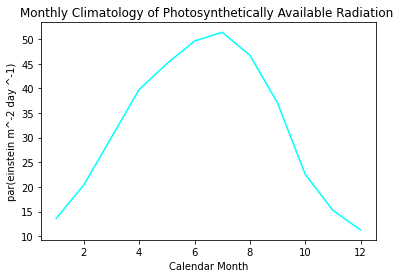

What's the dataset ID?erdVH2018parmday


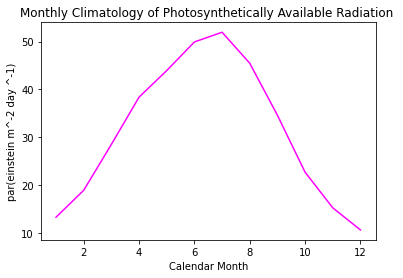

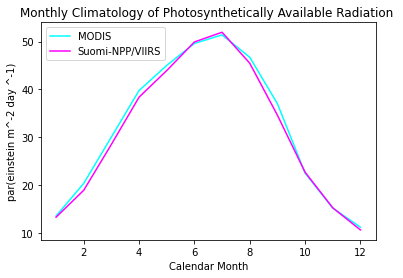

In [5]:
#Need to put in the MH one first, then VH
conditionals()
climatology()
#below, I set the variables means2, timearray2, and satellite2, because once I run the two functions again the variables means, timearray, and satellite will be given new values. So I need to store them in separate variables to use them later in plotting.
finalmeans2 = finalmeans
satellite2 = satellite
conditionals()
climatology()
finalmeans3 = finalmeans
satellite3 = satellite
fig, ax = plt.subplots()
ax.plot(months, finalmeans2, label = satellite2, color = 'cyan')
ax.plot(months, finalmeans3, label = satellite3, color = 'magenta')
plt.legend(loc='best')
plt.xlabel('Calendar Month')
plt.ylabel(myvar+'('+unit+')')
plt.title('Monthly Climatology of '+title)
#plt.savefig(f"{images_dir}/"+tt+"Climatology"+myvar+" .png")
plt.show()